# **Curso** : Python for Data Science

**Sesión 05**
Reducción de Dimensionalidad

**Profesor**:
* Ing. Cristhian Castro Chávez
* castro.ca@pucp.pe


In [1]:
import pandas as pd

# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np
from sklearn.decomposition import PCA
%matplotlib inline
plt.style.use('default')
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# (1) Entendiendo PCA paso a paso

## Eigendecomposition de la matriz de covarianza vs SVD

In [2]:
## Creamos un arreglo de prueba de dimensiones 5x5
matrix_A = np.array([
    [20,50,4,240],
    [25,60,5,300],
    [30,65,5.5,280],
    [40,75,6,265],
    [30,55,3,310]
])

In [3]:
matrix_A

array([[ 20. ,  50. ,   4. , 240. ],
       [ 25. ,  60. ,   5. , 300. ],
       [ 30. ,  65. ,   5.5, 280. ],
       [ 40. ,  75. ,   6. , 265. ],
       [ 30. ,  55. ,   3. , 310. ]])

In [4]:
#Paso 1 : Centramos la data (restamos el promedio)

A_centered = matrix_A - np.mean(matrix_A.T, axis=1)
A_centered

array([[ -9. , -11. ,  -0.7, -39. ],
       [ -4. ,  -1. ,   0.3,  21. ],
       [  1. ,   4. ,   0.8,   1. ],
       [ 11. ,  14. ,   1.3, -14. ],
       [  1. ,  -6. ,  -1.7,  31. ]])

In [5]:
# Paso 2: Calculamos la matriz de covarianza
mat_cov = np.cov(A_centered.T)
mat_cov

array([[ 55.   ,  63.75 ,   4.625,  36.25 ],
       [ 63.75 ,  92.5  ,   9.75 ,   7.5  ],
       [  4.625,   9.75 ,   1.45 ,  -9.125],
       [ 36.25 ,   7.5  ,  -9.125, 780.   ]])

In [6]:
# Calculamos los eigen values y eigen vector de la matriz de covarianzas. Para eso usamos np.linalg

eigen_values, eigen_vectors  = np.linalg.eig(mat_cov)
print('Eigen values:')
print(eigen_values)

print('')

print('Eigen vectors:')
print(eigen_vectors.T)

Eigen values:
[7.82071833e+02 1.39879358e+02 6.99670043e+00 2.10917291e-03]

Eigen vectors:
[[ 0.05106462  0.01542297 -0.01117685  0.9985137 ]
 [-0.58948655 -0.8028268  -0.07898694  0.04166298]
 [ 0.78879431 -0.55527664 -0.26128178 -0.03468732]
 [ 0.1664378  -0.21656204  0.96196048  0.00560096]]


In [7]:
# Podemos usar SVD para comprobarlo (otro método menos costoso cuando hablamos de miles de dimensiones)

U, s, VT = np.linalg.svd(A_centered)

print('Left Singular Vectors')
print(U)
print('')
print('Singular Values')
print(s)
print('')
print('Right Singular Vector o Eigen vectors:')
print(VT)

Left Singular Vectors
[[-0.70736046 -0.53127776  0.10294344 -0.08238787  0.4472136 ]
 [ 0.37091628 -0.16961102 -0.64396115 -0.46793937  0.4472136 ]
 [ 0.01970869  0.16159215 -0.31681363  0.82044419  0.4472136 ]
 [-0.23629234  0.77829534  0.1982552  -0.3148288   0.4472136 ]
 [ 0.55302784 -0.23899871  0.65957614  0.04471184  0.4472136 ]]

Singular Values
[55.93109449 23.6541208   5.29025535  0.09185146]

Right Singular Vector o Eigen vectors:
[[ 0.05106462  0.01542297 -0.01117685  0.9985137 ]
 [ 0.58948655  0.8028268   0.07898694 -0.04166298]
 [ 0.78879431 -0.55527664 -0.26128178 -0.03468732]
 [ 0.1664378  -0.21656204  0.96196048  0.00560096]]


In [8]:
# La raíz cuadrada de los eigenvalues que hallamos anteriormente corresponden a los singular values (matriz diagonal Sigma)
np.sqrt(eigen_values)*2

array([55.93109449, 23.6541208 ,  5.29025535,  0.09185146])

In [9]:
matrix_A

array([[ 20. ,  50. ,   4. , 240. ],
       [ 25. ,  60. ,   5. , 300. ],
       [ 30. ,  65. ,   5.5, 280. ],
       [ 40. ,  75. ,   6. , 265. ],
       [ 30. ,  55. ,   3. , 310. ]])

In [10]:
#Verificamos con PCA de sklearn.decomposition
model = PCA()
pca_features = model.fit_transform(matrix_A)

#Con .components_ podemos visualizar los vectores de carga (loadings) que es igual a los eigen vector
model.components_

array([[-0.05106462, -0.01542297,  0.01117685, -0.9985137 ],
       [ 0.58948655,  0.8028268 ,  0.07898694, -0.04166298],
       [ 0.78879431, -0.55527664, -0.26128178, -0.03468732],
       [ 0.1664378 , -0.21656204,  0.96196048,  0.00560096]])

In [11]:
print('Eigen vectors que calculamos con SVD:')
print(VT)

Eigen vectors que calculamos con SVD:
[[ 0.05106462  0.01542297 -0.01117685  0.9985137 ]
 [ 0.58948655  0.8028268   0.07898694 -0.04166298]
 [ 0.78879431 -0.55527664 -0.26128178 -0.03468732]
 [ 0.1664378  -0.21656204  0.96196048  0.00560096]]


In [12]:
# Y a su vez lo mismo que los eigenvectors de la eigen-decomposition de la matriz de covarianza
print('Eigen vectors:')
print(eigen_vectors.T)

Eigen vectors:
[[ 0.05106462  0.01542297 -0.01117685  0.9985137 ]
 [-0.58948655 -0.8028268  -0.07898694  0.04166298]
 [ 0.78879431 -0.55527664 -0.26128178 -0.03468732]
 [ 0.1664378  -0.21656204  0.96196048  0.00560096]]


In [13]:
# La varianza explicada obtenida con PCA de sklearn (PCA)
model.explained_variance_

array([7.82071833e+02, 1.39879358e+02, 6.99670043e+00, 2.10917291e-03])

In [14]:
# También es lo mismo que los eigenvalues de la eigen-decomposition de la matriz de covarianza
print('Eigen values:')
print(eigen_values)

Eigen values:
[7.82071833e+02 1.39879358e+02 6.99670043e+00 2.10917291e-03]


In [15]:
# De igual forma tiene relación con los singular values de la matriz sigma triangular
print('Singular Values')
print((s/2)**2)

Singular Values
[7.82071833e+02 1.39879358e+02 6.99670043e+00 2.10917291e-03]


In [16]:
model.explained_variance_

array([7.82071833e+02, 1.39879358e+02, 6.99670043e+00, 2.10917291e-03])

In [17]:
#Esto muestra la ganancia acumulada por cada CP (PCA)
model.explained_variance_ratio_

array([8.41887973e-01, 1.50577919e-01, 7.53183748e-03, 2.27049131e-06])

In [18]:
#La contribución del Primer Comp. Principal
7.82071833e+02 / (7.82071833e+02 +1.39879358e+02 +6.99670043e+00 + 2.10917291e-03 )

0.8418879729720838

In [19]:
#La contribución de CP1 + CP2 (varianza explicada)
(7.82071833e+02+1.39879358e+02) / (7.82071833e+02 +1.39879358e+02 +6.99670043e+00 + 2.10917291e-03 )

0.9924658920303917

Los signos de los vectores propios y las cargas son arbitrarios, por lo que no hay nada "incorrecto" aquí. Lo único que debe esperar que se conserve es el patrón general de signos dentro de cada vector de carga, es decir, en el ejemplo anterior, la respuesta princomp para PC1 da +,+,-,-,- mientras que la suya da -,-,+, +,+. Está bien. Si el tuyo dio p. -,+,-,-,+ eso sería un problema (porque los dos ya no serían equivalentes hasta la multiplicación por -1).

Los signos son arbitrarios y, por lo tanto, pueden variar entre algoritmos, compiladores, sistemas operativos, etc.

Veamos un segundo ejemplo:

## Ejemplo con datos de 2 variables

In [20]:
#Leemos información ancho y largo de granos de cultivo
grains = pd.read_csv('https://raw.githubusercontent.com/CristhianCastro25/Data_analytics/main/Sesion_7/seeds-width-vs-length.csv',header=None)
grains.columns = ['width','lenght']

In [21]:
grains.head()

,width,lenght
0,3.312,5.763
1,3.333,5.554
2,3.337,5.291
3,3.379,5.324
4,3.562,5.658


In [22]:
grains.shape

(210, 2)

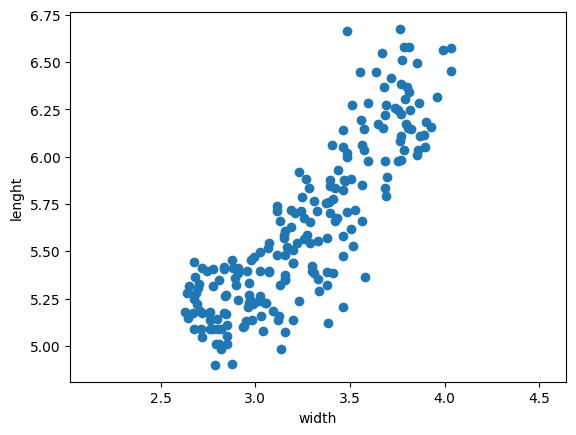

Correlación de Pearson:  0.86


In [23]:
width = grains['width']
length = grains['lenght']

# Scatter plot de las 2 variables
plt.scatter(width, length)
plt.xlabel('width')
plt.ylabel('lenght')
plt.axis('equal')
plt.show()

# Calculamos la correlación entre las 2 variables
correlation, pvalue = pearsonr(width,length)

# Mostramos la correlación:
print('Correlación de Pearson: ' , np.round(correlation,2))


In [24]:
#Qué tal si calculamos los componentes principales, los dibujamos y vemos la correlación?

model = PCA()
pca_features = model.fit_transform(grains)
pca_features

array([[ 1.37546375e-01,  4.48701536e-02],
       [-9.77931663e-03, -1.04853394e-01],
       [-2.09502378e-01, -2.76013257e-01],
       [-1.57279093e-01, -2.87226133e-01],
       [ 2.16563481e-01, -2.14516232e-01],
       [-1.52413159e-01, -1.96070646e-01],
       [-5.01506254e-02, -4.21863576e-02],
       [-1.32653965e-01, -1.66650003e-01],
       [ 4.58374510e-01,  1.12533346e-01],
       [ 3.53956661e-01, -2.62395364e-02],
       [ 5.51223081e-02,  6.73928808e-02],
       [-1.83358870e-01, -7.74647317e-02],
       [-1.83867947e-01, -7.52873846e-02],
       [-1.80584321e-01, -1.66510665e-02],
       [-2.05119162e-01,  1.75694184e-02],
       [-1.65911373e-01, -2.34590748e-01],
       [-3.12392996e-01, -4.21318181e-01],
       [ 8.51314987e-02, -2.61320442e-01],
       [-1.93203059e-01, -4.30192803e-01],
       [-4.43556277e-01, -9.60472265e-02],
       [-6.01669339e-02,  1.18514214e-01],
       [-1.41381057e-01,  3.22563195e-04],
       [ 1.50648029e-01, -1.97778454e-01],
       [-6.

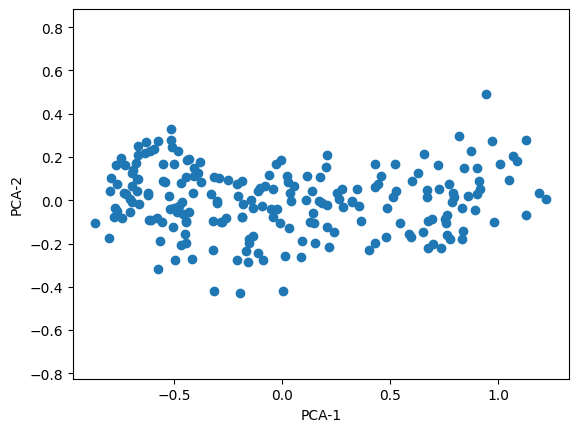

Correlación de Pearson:  0.0


In [25]:
#pca features almacena la data transformada. Cada columna corresponde a un Componente principal- Solo hay 2 componentes en este caso- PC1 y PC2

xs = pca_features[:,0]
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.xlabel('PCA-1')
plt.ylabel('PCA-2')
plt.show()

correlation, pvalue = pearsonr(xs, ys)

print('Correlación de Pearson: ' , np.round(correlation,2))

In [26]:
# Vamos a entender cómo se calcularon los componente principales, paso a paso.

# Paso 1: Centramos los datos
from sklearn.preprocessing import scale
grains_centrado = grains.copy()
grains_centrado['width'] = (grains_centrado['width']- grains_centrado['width'].mean())
grains_centrado['lenght'] = (grains_centrado['lenght']- grains_centrado['lenght'].mean())

In [27]:
#Paso 2: Calculamos la matriz de covarianza. Será una matriz de 2 x 2 dado que tenemos solo 2 features
mat_cov = grains_centrado.cov()
mat_cov

,width,lenght
width,0.142668,0.143992
lenght,0.143992,0.196305


In [28]:
mat_cov.columns

Index(['width', 'lenght'], dtype='object')

In [29]:
grains.shape

(210, 2)

In [30]:
np.cov(grains_centrado['width']), np.cov(grains_centrado['lenght'])

(array(0.1426682), array(0.19630525))

In [31]:
# Descomponemos los eigen values y eigen vector de la matriz de covarianzas
eigen_values, eigen_vectors  = np.linalg.eig(mat_cov)

print('Eigen values:')
print(eigen_values)
print('')
print('Eigen vectors:')
print(eigen_vectors.T)

Eigen values:
[0.02301882 0.31595462]

Eigen vectors:
[[-0.76912343  0.63910027]
 [-0.63910027 -0.76912343]]


In [32]:
# Los eigen vectors (ordenados por su correspondiente eigen value), corresponde a los loadings (matriz de cargas de los CP)
# Debereríamos encontrar lo mismo que:
model.components_

array([[ 0.63910027,  0.76912343],
       [-0.76912343,  0.63910027]])

In [33]:
pc_comps = ['PC1','PC2']
data_pca = pd.DataFrame(np.round(model.components_[:2,:],2),index=pc_comps,columns=mat_cov.columns)
data_pca.T

,PC1,PC2
width,0.64,-0.77
lenght,0.77,0.64


In [34]:
def color_high(val):
    if val <= -0.40: # you can decide any value as per your understanding
        return 'background: pink'
    elif val >= 0.40:
        return 'background: skyblue'

data_pca.T.style.applymap(color_high)

,PC1,PC2
width,0.640000,-0.770000
lenght,0.770000,0.640000


In [35]:
#Comprobamos con el producto de las matrizes original y loadings
grains_centrado.shape, model.components_[1]

((210, 2), array([-0.76912343,  0.63910027]))

In [36]:
#Este es el nuevo espacio transformado para el CP 1. Vemos los 10 primeros elementos
print(xs[:10])
print('')
print('Cantidad de elemenos, la misma cantidad que los datos originales: ', len(xs))

[ 0.13754637 -0.00977932 -0.20950238 -0.15727909  0.21656348 -0.15241316
 -0.05015063 -0.13265396  0.45837451  0.35395666]

Cantidad de elemenos, la misma cantidad que los datos originales:  210


In [37]:
eigen_vectors

array([[-0.76912343, -0.63910027],
       [ 0.63910027, -0.76912343]])

In [38]:
eigen_vectors.T[1]

array([-0.63910027, -0.76912343])

In [39]:
#Lo cual es lo mismo que realizar el producto punto de los datos centrados con los eigen vector
grains_centrado.dot(-eigen_vectors.T[1])

0      0.137546
1     -0.009779
2     -0.209502
3     -0.157279
4      0.216563
         ...   
205   -0.555467
206   -0.672032
207   -0.318910
208   -0.618910
209   -0.478414
Length: 210, dtype: float64

In [40]:
#Este es el nuevo espacio transformado para el CP 2
print(ys[:10])
print(len(ys))

[ 0.04487015 -0.10485339 -0.27601326 -0.28722613 -0.21451623 -0.19607065
 -0.04218636 -0.16665     0.11253335 -0.02623954]
210


In [41]:
#Lo cual es lo mismo que:
grains_centrado.dot(eigen_vectors.T[0])

0      0.044870
1     -0.104853
2     -0.276013
3     -0.287226
4     -0.214516
         ...   
205   -0.100627
206    0.044348
207   -0.230406
208    0.035182
209   -0.027498
Length: 210, dtype: float64

# (2) Análisis de Componentes Principales: Conjunto de datos de países

https://www.kaggle.com/datasets/fernandol/countries-of-the-world


In [42]:
df = pd.read_csv('https://raw.githubusercontent.com/CristhianCastro25/Data_analytics/main/Sesion_7/countries%20of%20the%20world.csv')
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             179 non-null    object 
 1   Region                              179 non-null    object 
 2   Population                          179 non-null    int64  
 3   Area (sq. mi.)                      179 non-null    int64  
 4   Pop. Density (per sq. mi.)          179 non-null    object 
 5   Coastline (coast/area ratio)        179 non-null    object 
 6   Net migration                       179 non-null    object 
 7   Infant mortality (per 1000 births)  179 non-null    object 
 8   GDP ($ per capita)                  179 non-null    float64
 9   Literacy (%)                        179 non-null    object 
 10  Phones (per 1000)                   179 non-null    object 
 11  Arable (%)                          179 non-null  

In [43]:
df.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [44]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
6,Anguilla,LATIN AMER. & CARIB,13477,102,"132,1","59,80","10,76","21,03",8600.0,"95,0","460,0",0,0,100,2,"14,17","5,34","0,04","0,18","0,78"
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,"156,0","34,54","-6,15","19,46",11000.0,"89,0","549,9","18,18","4,55","77,27",2,"16,93","5,37","0,038","0,22","0,743"


In [45]:
#Eliminamos algunas variables que no necesitaremos en el estudio
df.drop(['Arable (%)','Crops (%)', 'Other (%)','Climate','Coastline (coast/area ratio)'], axis=1,inplace=True)
df.reset_index(drop=True, inplace=True)

In [46]:
# shift column 'C' to first position
move_column = df.pop('GDP ($ per capita)')

# insert column using insert(position,column_name,first_column) function
df.insert(4,'GDP ($ per capita)', move_column)

In [47]:
df.head()

,Country,Region,Population,Area (sq. mi.),GDP ($ per capita),Pop. Density (per sq. mi.),Net migration,Infant mortality (per 1000 births),Literacy (%),Phones (per 1000),Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,700.0,"48,0","23,06","163,07","36,0","3,2","46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,4500.0,"124,6","-4,93","21,52","86,5","71,2","15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,6000.0,"13,8","-0,39",31,"70,0","78,1","17,14","4,61","0,101","0,6","0,298"
3,Anguilla,LATIN AMER. & CARIB,13477,102,8600.0,"132,1","10,76","21,03","95,0","460,0","14,17","5,34","0,04","0,18","0,78"
4,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,11000.0,"156,0","-6,15","19,46","89,0","549,9","16,93","5,37","0,038","0,22","0,743"


In [48]:
df.shape

(179, 15)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             179 non-null    object 
 1   Region                              179 non-null    object 
 2   Population                          179 non-null    int64  
 3   Area (sq. mi.)                      179 non-null    int64  
 4   GDP ($ per capita)                  179 non-null    float64
 5   Pop. Density (per sq. mi.)          179 non-null    object 
 6   Net migration                       179 non-null    object 
 7   Infant mortality (per 1000 births)  179 non-null    object 
 8   Literacy (%)                        179 non-null    object 
 9   Phones (per 1000)                   179 non-null    object 
 10  Birthrate                           179 non-null    object 
 11  Deathrate                           179 non-n

In [50]:
for col in df.columns[5:]:
    print(col)
    df[col] = df[col].str.replace(",",".").astype(float)

Pop. Density (per sq. mi.)
Net migration
Infant mortality (per 1000 births)
Literacy (%)
Phones (per 1000)
Birthrate
Deathrate
Agriculture
Industry
Service


In [51]:
df.dtypes

Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
GDP ($ per capita)                    float64
Pop. Density (per sq. mi.)            float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
Literacy (%)                          float64
Phones (per 1000)                     float64
Birthrate                             float64
Deathrate                             float64
Agriculture                           float64
Industry                              float64
Service                               float64
dtype: object

Empecemos por dar una rápida mirada al valor medio de cada columna:

In [52]:
df.describe()

,Population,Area (sq. mi.),GDP ($ per capita),Pop. Density (per sq. mi.),Net migration,Infant mortality (per 1000 births),Literacy (%),Phones (per 1000),Birthrate,Deathrate,Agriculture,Industry,Service
count,1.790000e+02,1.790000e+02,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,3.421415e+07,5.641830e+05,9125.698324,294.805028,-0.206536,38.898156,81.944134,208.151955,23.067486,9.465140,0.156905,0.288028,0.554508
std,1.317639e+08,1.395657e+06,9644.123141,1379.352557,4.751216,35.353003,19.837537,210.121875,11.287207,5.210083,0.151343,0.140310,0.165670
min,1.347700e+04,2.800000e+01,500.000000,1.800000,-20.990000,2.290000,17.600000,0.200000,7.290000,2.410000,0.000000,0.032000,0.062000
25%,1.188580e+06,1.991500e+04,1800.000000,26.800000,-1.315000,9.990000,69.950000,27.100000,13.890000,5.795000,0.039000,0.197000,0.424500
50%,6.940432e+06,1.184800e+05,5100.000000,66.900000,0.000000,24.310000,90.900000,137.100000,20.460000,7.840000,0.101000,0.274000,0.559000
75%,2.086014e+07,4.964410e+05,12950.000000,164.700000,0.395000,64.605000,97.800000,335.000000,32.315000,11.660000,0.233000,0.349000,0.668500
max,1.313974e+09,9.631420e+06,37800.000000,16183.000000,23.060000,163.070000,100.000000,898.000000,50.730000,29.740000,0.769000,0.906000,0.954000


In [56]:
df.set_index('Country')

,Region,Population,Area (sq. mi.),GDP ($ per capita),Pop. Density (per sq. mi.),Net migration,Infant mortality (per 1000 births),Literacy (%),Phones (per 1000),Birthrate,Deathrate,Agriculture,Industry,Service
Country,,,,,,,,,,,,,,
Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,700.0,48.0,23.06,163.07,36.0,3.2,46.60,20.34,0.380,0.240,0.380
Albania,EASTERN EUROPE,3581655,28748,4500.0,124.6,-4.93,21.52,86.5,71.2,15.11,5.22,0.232,0.188,0.579
Algeria,NORTHERN AFRICA,32930091,2381740,6000.0,13.8,-0.39,31.00,70.0,78.1,17.14,4.61,0.101,0.600,0.298
Anguilla,LATIN AMER. & CARIB,13477,102,8600.0,132.1,10.76,21.03,95.0,460.0,14.17,5.34,0.040,0.180,0.780
Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,11000.0,156.0,-6.15,19.46,89.0,549.9,16.93,5.37,0.038,0.220,0.743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,LATIN AMER. & CARIB,25730435,912050,4800.0,28.2,-0.04,22.20,93.4,140.1,18.71,4.92,0.040,0.419,0.541
Vietnam,ASIA (EX. NEAR EAST),84402966,329560,2500.0,256.1,-0.45,25.95,90.3,187.7,16.86,6.22,0.209,0.410,0.381
Yemen,NEAR EAST,21456188,527970,800.0,40.6,0.00,61.50,50.2,37.2,42.89,8.30,0.135,0.472,0.393


In [57]:
# Movemos la variable País como índice y elimimamos Region (no la necesitamos por ahora)
df_ = df.set_index('Country')
df_.drop('Region', axis=1, inplace=True)

In [58]:
df_.head()

,Population,Area (sq. mi.),GDP ($ per capita),Pop. Density (per sq. mi.),Net migration,Infant mortality (per 1000 births),Literacy (%),Phones (per 1000),Birthrate,Deathrate,Agriculture,Industry,Service
Country,,,,,,,,,,,,,
Afghanistan,31056997,647500,700.0,48.0,23.06,163.07,36.0,3.2,46.60,20.34,0.380,0.240,0.380
Albania,3581655,28748,4500.0,124.6,-4.93,21.52,86.5,71.2,15.11,5.22,0.232,0.188,0.579
Algeria,32930091,2381740,6000.0,13.8,-0.39,31.00,70.0,78.1,17.14,4.61,0.101,0.600,0.298
Anguilla,13477,102,8600.0,132.1,10.76,21.03,95.0,460.0,14.17,5.34,0.040,0.180,0.780
Antigua & Barbuda,69108,443,11000.0,156.0,-6.15,19.46,89.0,549.9,16.93,5.37,0.038,0.220,0.743


<Axes: >

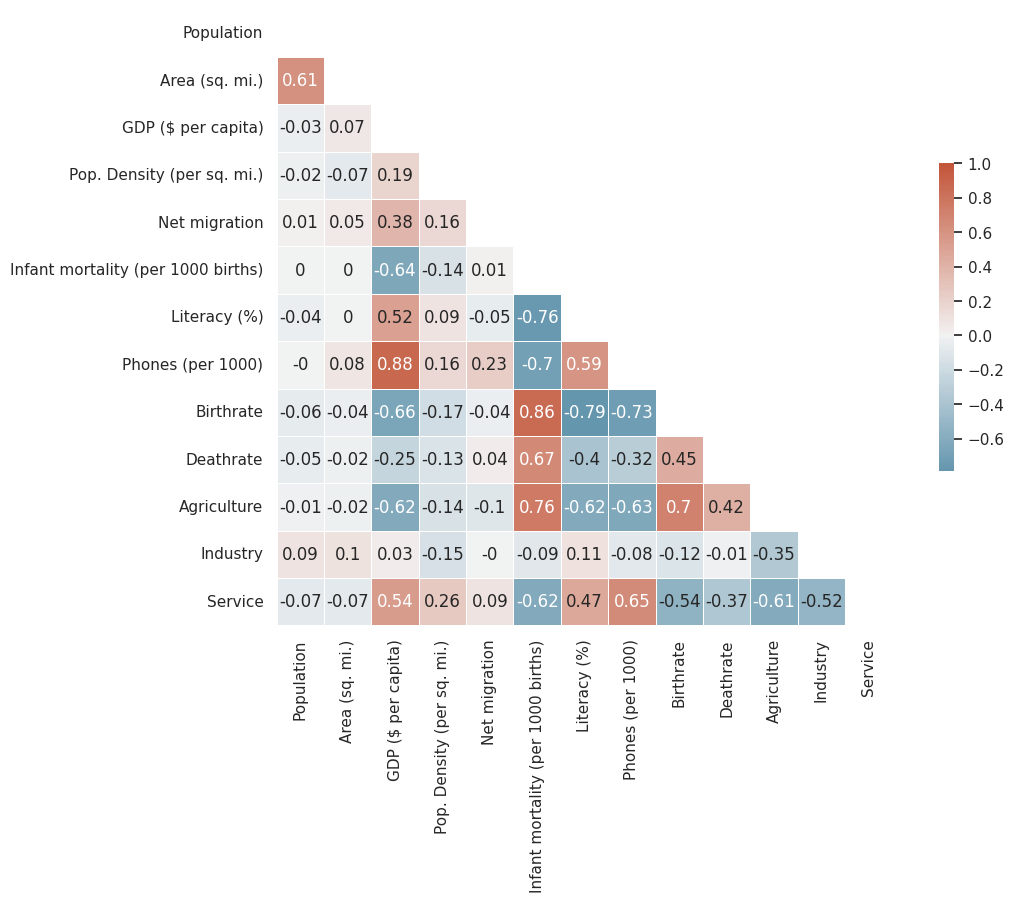

In [60]:
#Matriz de correlación
import seaborn as sns
sns.set_theme(style="white")

corr = np.round(df_.corr(),2)
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(12, 8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Vemos de inmediato que los datos tienen valores medios **notablemente** diferentes. También podemos examinar la varianza de las cuatro variables:

In [63]:
df_.var()

Population                            1.736172e+16
Area (sq. mi.)                        1.947859e+12
GDP ($ per capita)                    9.300911e+07
Pop. Density (per sq. mi.)            1.902613e+06
Net migration                         2.257405e+01
Infant mortality (per 1000 births)    1.249835e+03
Literacy (%)                          3.935279e+02
Phones (per 1000)                     4.415120e+04
Birthrate                             1.274011e+02
Deathrate                             2.714496e+01
Agriculture                           2.290464e-02
Industry                              1.968679e-02
Service                               2.744643e-02
dtype: float64

In [64]:
# Escalamos los datos debido a que están en distinta escala

from sklearn.preprocessing import scale
X = scale(df_)
#X = X -X.mean()
# La función scale es equivalente a:
# X = (df - np.mean(df, axis=0)) / np.std(df, axis=0)

In [65]:
df_.shape

(179, 13)

In [66]:
X.shape

(179, 13)

In [67]:
X

array([[-0.02402789,  0.05986479, -0.87611209, ...,  1.47823878,
        -0.3432598 , -1.05630628],
       [-0.23313231, -0.38471982, -0.48098449, ...,  0.49758315,
        -0.7149083 ,  0.14824877],
       [-0.00977248,  1.30594788, -0.32501307, ..., -0.37042959,
         2.22969138, -1.55265559],
       ...,
       [-0.09709601, -0.0260197 , -0.86571399, ..., -0.14514384,
         1.3148643 , -0.97761675],
       [-0.17285349,  0.13539111, -0.86571399, ...,  0.41807053,
         0.01409453, -0.39652487],
       [-0.16726125, -0.12473692, -0.75133495, ...,  0.14640242,
        -0.32181854,  0.14824877]])

Visualicemos los primeros 5 estados de `X` en un dataframe:

In [68]:
df_scaled = pd.DataFrame(X, index=df_.index, columns=df_.columns)
df_scaled

,Population,Area (sq. mi.),GDP ($ per capita),Pop. Density (per sq. mi.),Net migration,Infant mortality (per 1000 births),Literacy (%),Phones (per 1000),Birthrate,Deathrate,Agriculture,Industry,Service
Country,,,,,,,,,,,,,
Afghanistan,-0.024028,0.059865,-0.876112,-0.179430,4.910701,3.522194,-2.322517,-0.978132,2.090732,2.093127,1.478239,-0.343260,-1.056306
Albania,-0.233132,-0.384720,-0.480984,-0.123741,-0.996948,-0.492940,0.230303,-0.653602,-0.706978,-0.817079,0.497583,-0.714908,0.148249
Algeria,-0.009772,1.305948,-0.325013,-0.204294,-0.038722,-0.224035,-0.603787,-0.620672,-0.526624,-0.934488,-0.370430,2.229691,-1.552656
Anguilla,-0.260288,-0.405302,-0.054663,-0.118288,2.314628,-0.506839,0.659986,1.201943,-0.790492,-0.793982,-0.774619,-0.772085,1.364910
Antigua & Barbuda,-0.259865,-0.405057,0.194892,-0.100913,-1.254444,-0.551373,0.356680,1.630990,-0.545281,-0.788208,-0.787871,-0.486202,1.140947
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,-0.064566,0.249949,-0.449790,-0.193825,0.035150,-0.473651,0.579104,-0.324777,-0.387138,-0.874821,-0.774619,0.936069,-0.081767
Vietnam,0.381968,-0.168581,-0.688946,-0.028139,-0.051386,-0.367281,0.422396,-0.097607,-0.551500,-0.624605,0.345184,0.871745,-1.050253
Yemen,-0.097096,-0.026020,-0.865714,-0.184810,0.043592,0.641112,-1.604694,-0.815867,1.761119,-0.224259,-0.145144,1.314864,-0.977617


In [69]:
# Encontramos los PCA's (componentes principales). Por default calcula con n = número de columnas originales
pca = PCA(random_state=1)
data_pca1 = pd.DataFrame(pca.fit_transform(df_scaled))

# Esto calcula la varianza explicada por cada componente
exp_var = pca.explained_variance_ratio_

In [70]:
exp_var

array([4.10580506e-01, 1.34962229e-01, 1.12615890e-01, 9.56885146e-02,
       7.06561742e-02, 5.34445544e-02, 3.60332389e-02, 3.15888089e-02,
       2.77138401e-02, 1.35872617e-02, 7.72629554e-03, 5.34937481e-03,
       5.33118854e-05])

Text(0, 0.5, 'Cumulative Explained Variance')

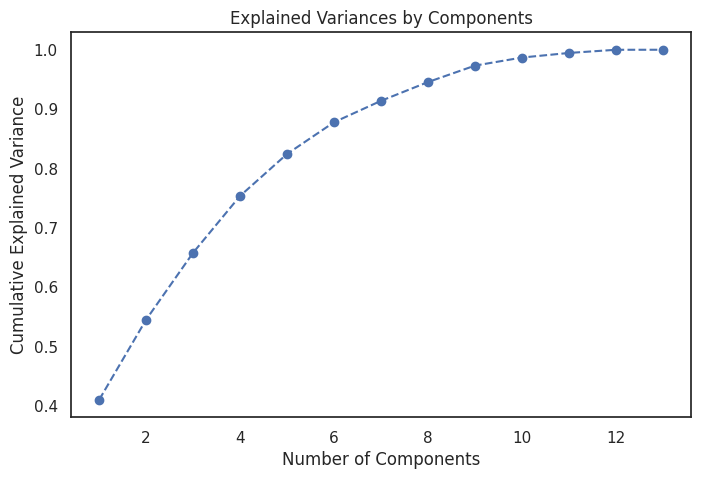

In [71]:
# Visualizamos la varianza explicada acumulada a medida que agregamos componentes
plt.figure(figsize = (8,5))
plt.plot(range(1,14), exp_var.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

In [72]:
# Encontramos el número de componentes para explicar por lo menos el 60% de la varianza total
sum = 0
for ix, i in enumerate(exp_var):
  sum = sum + i
  if(sum>0.60):
    print("Number of PCs that explain at least 60% variance: ", ix+1)
    break

Number of PCs that explain at least 60% variance:  3


**Observations**:

Podemos observar que de las 13 características originales, redujimos el número de características a través de componentes principales a 3; estos componentes explican más del 60% de la varianza original.

Ahora veamos estos componentes principales como una combinación lineal de las características originales.

In [73]:
pca.components_.shape


(13, 13)

In [74]:
pca.components_.T[:,:3]

array([[ 0.00060532,  0.55179134,  0.35420212],
       [-0.01227525,  0.55826111,  0.38543568],
       [-0.35094337, -0.01379573,  0.20259471],
       [-0.10466962, -0.20905815,  0.27447127],
       [-0.06477812, -0.0430811 ,  0.45640774],
       [ 0.39938089, -0.04386175,  0.16269232],
       [-0.34478979,  0.05519183, -0.21211987],
       [-0.37414716, -0.03524809,  0.18027473],
       [ 0.38749251, -0.08870195,  0.09930925],
       [ 0.24481913, -0.05143429,  0.15575432],
       [ 0.36109308, -0.11473758,  0.15267362],
       [-0.0107011 ,  0.47163922, -0.4333103 ],
       [-0.32027332, -0.29289081,  0.22834552]])

In [75]:
pc_comps = ['PC1','PC2','PC3']
data_pca = pd.DataFrame(np.round(pca.components_[:3,:],2),index=pc_comps,columns=df_scaled.columns)
data_pca.T

,PC1,PC2,PC3
Population,0.00,0.55,0.35
Area (sq. mi.),-0.01,0.56,0.39
GDP ($ per capita),-0.35,-0.01,0.20
Pop. Density (per sq. mi.),-0.10,-0.21,0.27
Net migration,-0.06,-0.04,0.46
Infant mortality (per 1000 births),0.40,-0.04,0.16
Literacy (%),-0.34,0.06,-0.21
Phones (per 1000),-0.37,-0.04,0.18
Birthrate,0.39,-0.09,0.10
Deathrate,0.24,-0.05,0.16


In [76]:
def color_high(val):
    if val <= -0.35: # you can decide any value as per your understanding
        return 'background: pink'
    elif val >= 0.35:
        return 'background: skyblue'

data_pca.T.style.applymap(color_high)

,PC1,PC2,PC3
Population,0.000000,0.550000,0.350000
Area (sq. mi.),-0.010000,0.560000,0.390000
GDP ($ per capita),-0.350000,-0.010000,0.200000
Pop. Density (per sq. mi.),-0.100000,-0.210000,0.270000
Net migration,-0.060000,-0.040000,0.460000
Infant mortality (per 1000 births),0.400000,-0.040000,0.160000
Literacy (%),-0.340000,0.060000,-0.210000
Phones (per 1000),-0.370000,-0.040000,0.180000
Birthrate,0.390000,-0.090000,0.100000
Deathrate,0.240000,-0.050000,0.160000


- Cada componente principal es una combinación lineal de las características originales.
- Por ejemplo, podemos escribir la ecuación para PC1 de la siguiente manera:
-0.01 Area -0.35 GDP + -0.10 Pop_density + -0.06 net_migration + 0.40 infant_mortality -0.34 Literacy -0.37 phones + 0.39 Birthrate  + 0.24 Deathrate + 0.36 Agriculture - 0.01 Industry - 0.32 Service.

El primer componente principal, PC1, es una medida de GDP, Infant_Mortality, dPhones, Birthrate y Agriculture. PC1 está asociado con puntuaciones altas en todas estas variables, excepto GDP y Phones, ya que estas variables tienen pesos negativos. PC1 está asociado con valores bajos de GDP.
- El segundo componente principal, PC2, es una medida de población, area y además industria. PC2 está asociado con valores altos de tamaño y población.
- El tercer componente principal, PC3, es una medida net_migration y además de valores bajos de Industria

Ahora usaremos la función `PCA()` de `sklearn` para calcular los vectores de cargas *(loadings)*, es decir, los coeficientes que cada variable aporta a cada uno de los componentes principales. Una vez ajustado el modelo, los vectores de carga pueden recuperarse con el atributo `components_`:

In [77]:
# Usando sklearn solo para retener los 3 primeros PCA
pca = PCA(random_state=1, n_components=3)
data_transformada = pca.fit_transform(X)

Visualizamos los puntajes para los primeros estados

In [78]:
df_plot = pd.DataFrame(data_transformada, columns=['PC1', 'PC2', 'PC3'], index=df_.index)
df_plot.head()

,PC1,PC2,PC3
Country,,,
Afghanistan,4.779176,-0.705227,3.585320
Albania,-0.114963,-0.543545,-0.842037
Algeria,0.379654,2.414557,-1.235054
Anguilla,-2.202520,-0.991914,1.084476
Antigua & Barbuda,-1.974143,-0.694865,-0.506256


In [79]:
df_plot.shape

(179, 3)

In [80]:
df_plot_3d = df_plot.reset_index()
df_plot_3d['Region'] = df['Region']
df_plot_3d.head(20)

,Country,PC1,PC2,PC3,Region
0,Afghanistan,4.779176,-0.705227,3.585320,ASIA (EX. NEAR EAST)
1,Albania,-0.114963,-0.543545,-0.842037,EASTERN EUROPE
2,Algeria,0.379654,2.414557,-1.235054,NORTHERN AFRICA
3,Anguilla,-2.202520,-0.991914,1.084476,LATIN AMER. & CARIB
4,Antigua & Barbuda,-1.974143,-0.694865,-0.506256,LATIN AMER. & CARIB
5,Argentina,-1.086977,1.374616,0.027350,LATIN AMER. & CARIB
6,Armenia,-0.114624,0.280905,-1.664288,C.W. OF IND. STATES
7,Aruba,-3.004155,-0.181165,-0.197751,LATIN AMER. & CARIB
8,Australia,-3.196335,2.659319,2.660982,OCEANIA
9,Austria,-2.928602,-0.225152,0.152732,WESTERN EUROPE


In [81]:
# Visualizamos en 3D
import plotly.express as px
px.scatter_3d(df_plot_3d.dropna(), x='PC1', y='PC2', z='PC3', height=700, text='Country', color='Region')

# (3) PCA Para visualizar datos - Breast Cancer

In [82]:
data = pd.read_csv('https://raw.githubusercontent.com/CristhianCastro25/Data_analytics/main/Sesion_5/data_breast_cancer_m.csv')

In [83]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,...,radius_worst,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,...,25.38,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,...,24.99,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,...,23.57,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,...,14.91,26.50,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,...,22.54,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [84]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst',
       'Unnamed: 32'],
      dtype='object')

<Axes: xlabel='compactness_mean', ylabel='Count'>

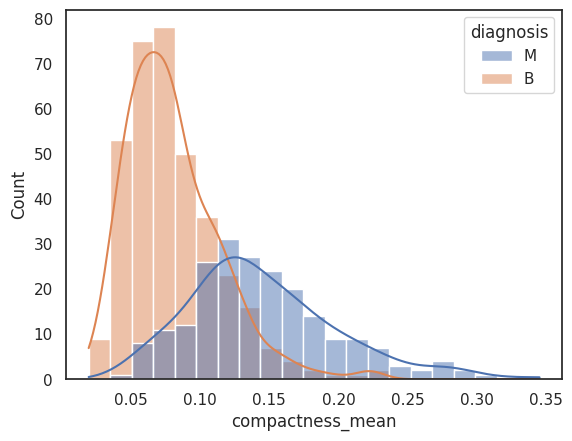

In [85]:
sns.histplot(data=data, x='compactness_mean', hue='diagnosis', kde=True)

<Axes: xlabel='concavity_mean', ylabel='Count'>

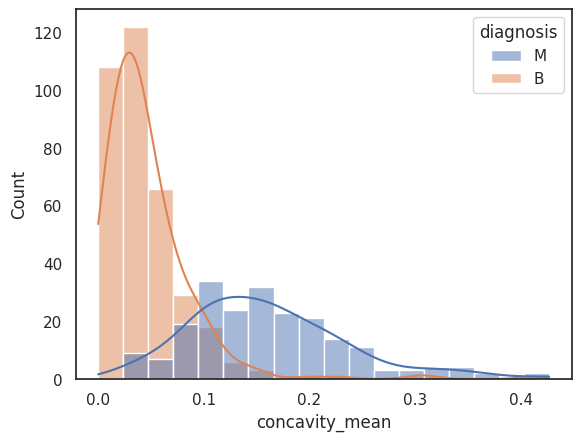

In [86]:
sns.histplot(data=data, x='concavity_mean', hue='diagnosis', kde=True)

<Axes: xlabel='radius_worst', ylabel='Count'>

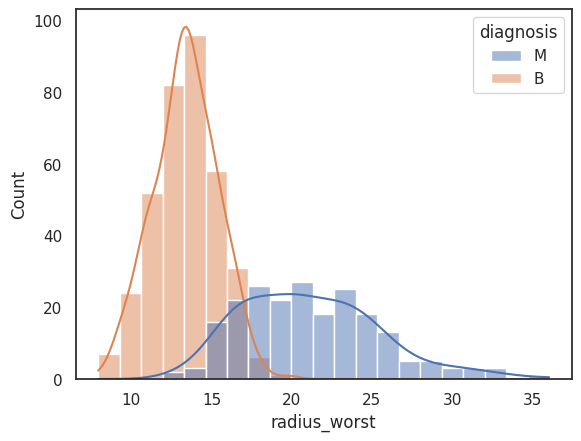

In [ ]:
sns.histplot(data=data, x='radius_worst', hue='diagnosis', kde=True)

In [ ]:
data.shape

(569, 31)

In [ ]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: int64

In [87]:
# ML con todas las variables disponibles
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# Importing metrics for evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

def evaluar_modelo(model):
  #Paso 1: Crear clasificador
  classifier = model

  #Paso 2: Entrenar
  classifier.fit(X_train, y_train)

  #Paso 3: Predice en Train y Test
  y_pred_test = classifier.predict(X_test)
  y_pred_train = classifier.predict(X_train)

  #Paso 4: Evaluamos en Train y Test
  print('Reporte de Clasificación en Train')
  print('-'*60)
  print(classification_report(y_train, y_pred_train))
  print('')
  print('Reporte de Clasificación en Test')
  print('-'*60)
  print(classification_report(y_test, y_pred_test))

  print(confusion_matrix(y_test, y_pred_test))

  # Accuracy score
  from sklearn.metrics import accuracy_score
  print('')
  print('Accuracy en Train',accuracy_score(y_pred_train,y_train))
  print('Accuracy en Test',accuracy_score(y_pred_test,y_test))

In [88]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,...,radius_worst,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,...,25.38,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,...,24.99,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,...,23.57,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,...,14.91,26.50,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,...,22.54,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [89]:
# Scaling the features
X = data.drop(['id','diagnosis','Unnamed: 32'], axis=1)
y = data['diagnosis']

# Dividimos los datos en train y test (30% para test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Una buena práctica es estandarizar los valores. Usaremos standart scaler
from sklearn.preprocessing import LabelEncoder,StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [90]:
#classifier = DecisionTreeClassifier(max_depth=5)
classifier = LogisticRegression()
evaluar_modelo(classifier)

Reporte de Clasificación en Train
------------------------------------------------------------
              precision    recall  f1-score   support

           B       0.98      1.00      0.99       249
           M       1.00      0.97      0.99       149

    accuracy                           0.99       398
   macro avg       0.99      0.99      0.99       398
weighted avg       0.99      0.99      0.99       398


Reporte de Clasificación en Test
------------------------------------------------------------
              precision    recall  f1-score   support

           B       0.98      0.98      0.98       108
           M       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

[[106   2]
 [  2  61]]

Accuracy en Train 0.9899497487437185
Accuracy en Test 0.9766081871345029


In [91]:
# PCA para reducir
X_ = data.drop(['id','diagnosis','Unnamed: 32'],axis=1)

In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_)
scaled_data =scaler.transform(X_)

In [93]:
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [94]:
pca = PCA(random_state=1)
data_transformada = pca.fit_transform(scaled_data)

In [95]:
X_.shape

(569, 28)

In [96]:
# Esto calcula la varianza explicada por cada componente
exp_var = pca.explained_variance_ratio_
exp_var

array([4.17192925e-01, 1.93605260e-01, 1.00263675e-01, 7.03946082e-02,
       5.87642939e-02, 4.30014907e-02, 2.35999324e-02, 1.66393475e-02,
       1.44430756e-02, 1.24835440e-02, 1.04285704e-02, 9.31295081e-03,
       8.41003268e-03, 5.30128752e-03, 3.20469839e-03, 2.35730768e-03,
       2.01870518e-03, 1.76128490e-03, 1.66027706e-03, 1.07349692e-03,
       1.05903291e-03, 8.71634570e-04, 7.89460690e-04, 5.91719748e-04,
       5.09439625e-04, 2.29830271e-04, 2.67835326e-05, 5.33413008e-06])

Text(0, 0.5, 'Cumulative Explained Variance')

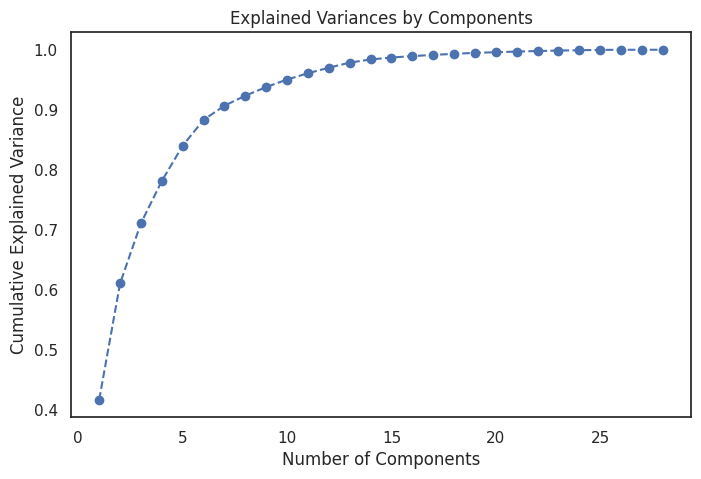

In [97]:
# Visualizamos la varianza explicada acumulada a medida que agregamos componentes
plt.figure(figsize = (8,5))
plt.plot(range(1,29), exp_var.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

In [98]:
pc_comps = ['PC1','PC2','PC3','PC4','PC5','PC6']
data_pca = pd.DataFrame(np.round(pca.components_[:6,:],2),index=pc_comps,columns=X_.columns)
data_pca.T

,PC1,PC2,PC3,PC4,PC5,PC6
radius_mean,0.22,-0.26,-0.02,0.05,0.03,0.02
texture_mean,0.11,-0.08,0.06,-0.60,-0.04,-0.03
perimeter_mean,0.23,-0.25,-0.02,0.05,0.03,0.02
area_mean,0.22,-0.26,0.02,0.06,0.01,-0.00
smoothness_mean,0.16,0.18,-0.10,0.15,-0.37,-0.29
compactness_mean,0.26,0.13,-0.08,0.04,0.01,-0.02
concavity_mean,0.28,0.03,-0.00,0.03,0.08,-0.01
symmetry_mean,0.16,0.18,-0.04,0.07,-0.31,0.35
fractal_dimension_mean,0.09,0.37,-0.01,0.05,-0.05,-0.12
radius_se,0.22,-0.14,0.26,0.10,-0.16,-0.03


In [99]:
def color_high(val):
    if val <= -0.25: # you can decide any value as per your understanding
        return 'background: pink'
    elif val >= 0.25:
        return 'background: skyblue'

data_pca.T.style.applymap(color_high)

,PC1,PC2,PC3,PC4,PC5,PC6
radius_mean,0.220000,-0.260000,-0.020000,0.050000,0.030000,0.020000
texture_mean,0.110000,-0.080000,0.060000,-0.600000,-0.040000,-0.030000
perimeter_mean,0.230000,-0.250000,-0.020000,0.050000,0.030000,0.020000
area_mean,0.220000,-0.260000,0.020000,0.060000,0.010000,-0.000000
smoothness_mean,0.160000,0.180000,-0.100000,0.150000,-0.370000,-0.290000
compactness_mean,0.260000,0.130000,-0.080000,0.040000,0.010000,-0.020000
concavity_mean,0.280000,0.030000,-0.000000,0.030000,0.080000,-0.010000
symmetry_mean,0.160000,0.180000,-0.040000,0.070000,-0.310000,0.350000
fractal_dimension_mean,0.090000,0.370000,-0.010000,0.050000,-0.050000,-0.120000
radius_se,0.220000,-0.140000,0.260000,0.100000,-0.160000,-0.030000


In [100]:
# Usando sklearn solo para retener los 3 primeros PCA
pca = PCA(random_state=1, n_components=8)
data_transformada = pca.fit_transform(scaled_data)

In [101]:
df_plot = pd.DataFrame(data_transformada, columns=['PC1', 'PC2', 'PC3','PC4','PC5','PC6','PC7','PC8'], index=data['diagnosis']).reset_index()
df_plot.head()

,diagnosis,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,M,8.611860,1.601749,-1.094583,3.655837,-1.285394,1.348616,2.175266,-0.262696
1,M,1.805294,-3.731453,-0.577716,1.167632,0.585399,0.006297,-0.036365,0.240447
2,M,5.145653,-1.336414,-0.590995,0.913135,-0.179749,0.558965,-0.624578,0.127042
3,M,7.774924,9.712423,-3.142328,0.155246,-3.010535,2.999856,1.418539,1.314468
4,M,3.356233,-2.068131,1.378014,2.929944,0.519672,-1.226049,-0.976012,0.607133


In [102]:
# Visualizamos en 2D
import plotly.express as px
px.scatter(df_plot.dropna(), x='PC1', y='PC2', height=600, width=800, color='diagnosis')

In [103]:
# Visualizamos en 3D

px.scatter_3d(df_plot.dropna(), x='PC1', y='PC2', z='PC3', height=700, width=900, color='diagnosis')

In [104]:
df_plot.head()

,diagnosis,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,M,8.611860,1.601749,-1.094583,3.655837,-1.285394,1.348616,2.175266,-0.262696
1,M,1.805294,-3.731453,-0.577716,1.167632,0.585399,0.006297,-0.036365,0.240447
2,M,5.145653,-1.336414,-0.590995,0.913135,-0.179749,0.558965,-0.624578,0.127042
3,M,7.774924,9.712423,-3.142328,0.155246,-3.010535,2.999856,1.418539,1.314468
4,M,3.356233,-2.068131,1.378014,2.929944,0.519672,-1.226049,-0.976012,0.607133


# (Optional) T-SNE MNIST

In [105]:
from sklearn import datasets, svm, metrics
digits = datasets.load_digits()

In [106]:
digits['data'].shape

(1797, 64)

In [107]:
digits['images'].shape

(1797, 8, 8)

In [108]:
digits['target']

array([0, 1, 2, ..., 8, 9, 8])

In [109]:
data = pd.DataFrame(digits['data'])
data['target'] = digits['target']

In [110]:
data.shape

(1797, 65)

In [111]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


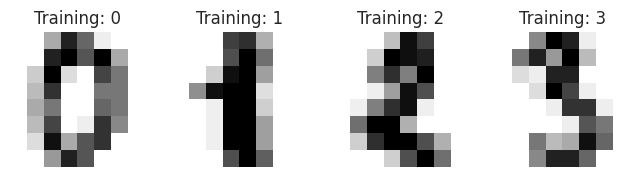

In [112]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(8, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [117]:
data.drop('target',axis=1).values

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [118]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
train = StandardScaler().fit_transform(data.drop('target',axis=1).values)
pca = PCA(n_components=2)
pca_res = pca.fit_transform(data.drop('target',axis=1).values)

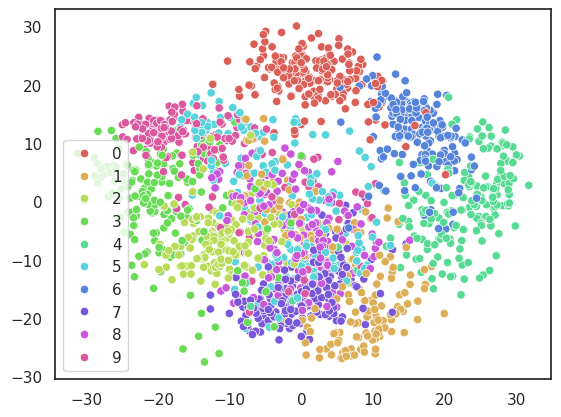

In [119]:
import seaborn as sns
sns.scatterplot(x = pca_res[:,0], y = pca_res[:,1], hue = digits['target'], palette = sns.hls_palette(10), legend = 'full');

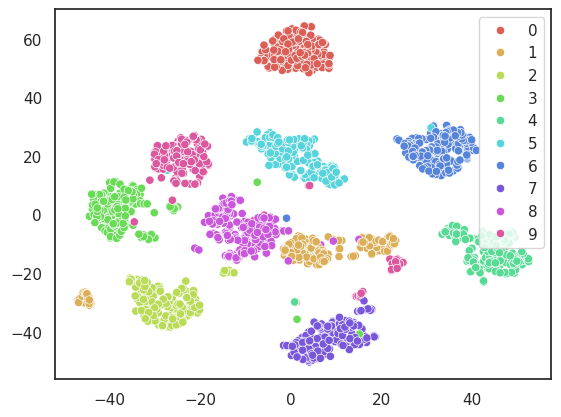

In [121]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, random_state=0)
tsne_res = tsne.fit_transform(data.drop('target',axis=1).values)

sns.scatterplot(x = tsne_res[:,0], y = tsne_res[:,1], hue = digits['target'], palette = sns.hls_palette(10), legend = 'full');

In [123]:
# En 3 dimensiones
tsne = TSNE(n_components = 3, random_state=0)
tsne_res = tsne.fit_transform(data.drop('target',axis=1).values)

In [124]:
tsne_df = pd.DataFrame(columns = ['comp1','comp2','comp3'])

tsne_df['comp1'] = tsne_res[:,0]
tsne_df['comp2'] = tsne_res[:,1]
tsne_df['comp3'] = tsne_res[:,2]
tsne_df['target'] = digits['target']
tsne_df['target']  = tsne_df['target'].astype('str')

In [125]:
tsne_df.head()

,comp1,comp2,comp3,target
0,0.539482,16.555151,-3.026696,0
1,7.722620,-1.596364,0.635402,1
2,1.106529,-7.964299,7.770226,2
3,-10.666593,-2.631496,0.015180,3
4,13.209776,1.895907,-5.483112,4


In [126]:
import plotly.express as px
fig = px.scatter_3d(tsne_df.reset_index(), x="comp1", y="comp2",z="comp3",color='target',text='target',height=600,width=800 , hover_data=['index'])
fig.show()

In [127]:
tsne_df.head()

,comp1,comp2,comp3,target
0,0.539482,16.555151,-3.026696,0
1,7.722620,-1.596364,0.635402,1
2,1.106529,-7.964299,7.770226,2
3,-10.666593,-2.631496,0.015180,3
4,13.209776,1.895907,-5.483112,4


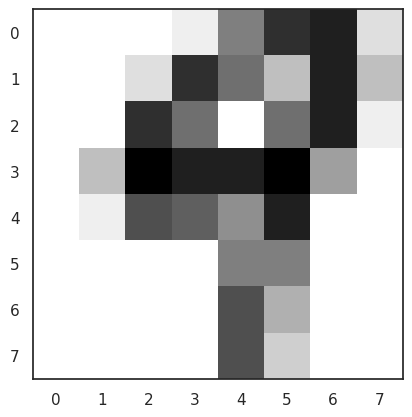

In [128]:
num = digits.images[765]
#ax.set_axis_off()
plt.imshow(num, cmap=plt.cm.gray_r, interpolation='nearest')
#ax.set_title('Training: %i' % label)
plt.show()

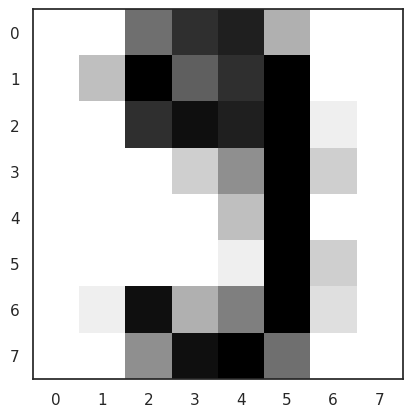

In [129]:
num = digits.images[92]
#ax.set_axis_off()
plt.imshow(num, cmap=plt.cm.gray_r, interpolation='nearest')
#ax.set_title('Training: %i' % label)
plt.show()

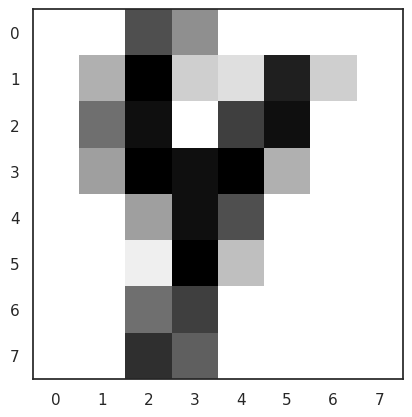

In [130]:
num = digits.images[1660]
#ax.set_axis_off()
plt.imshow(num, cmap=plt.cm.gray_r, interpolation='nearest')
#ax.set_title('Training: %i' % label)
plt.show()